In [21]:
import pandas as pd
import numpy as np
import os
np.random.seed(42)
print(os.getcwd()) 
import sklearn
import matplotlib.pyplot as plt
#data = pd.read_csv('D:/Code/udacity/finance/JGB_and_IRS.csv',index_col='date',parse_dates=True)
data = pd.read_csv('D:/Code/udacity/finance/allfactor.csv', index_col='date',parse_dates=True)

D:\Code\udacity


### date must be in 2018/04/05 format

In [22]:
data.head()

,JY0003M,JYSW2,JYFS023,JYFS055,JYFS1010,JYFS2010,US0003M,USSW2,USFS023,USFS055,...,.A20,JGBS1,USDJPY12M,JPY,USSP10,JYBS10 MTRT,USDEUR12M,FEDL01,NKYTR,NKY
date,,,,,,,,,,,,,,,,,,,,,
2018-11-16,-0.10533,0.03500,0.1414,0.4814,1.1441,1.3404,2.64450,2.9931,3.0250,3.2468,...,-0.0540,-0.16,-358.27,112.83,6.23,-53.250,-284.65152,2.19,34344.35,21680.34
2018-11-09,-0.10333,0.03625,0.1594,0.5206,1.2009,1.4003,2.61813,3.1194,3.2037,3.3300,...,-0.0710,2.20,-371.25,113.83,6.03,-52.375,-296.07013,2.20,35247.15,22250.25
2018-11-02,-0.09517,0.04250,0.1698,0.5168,1.1690,1.3541,2.59238,3.1122,3.1850,3.3851,...,-0.0718,2.20,-364.50,113.20,6.24,-51.625,-291.79944,2.20,35236.17,22243.66
2018-10-26,-0.09550,0.04625,0.1644,0.5029,1.1322,1.3259,2.52038,3.0165,3.0540,3.2307,...,-0.0608,2.19,-355.25,111.91,6.17,-50.750,-289.13535,2.19,33528.20,21184.60
2018-10-19,-0.09067,0.05750,0.2057,0.5649,1.2030,1.4052,2.47719,3.1110,3.2503,3.3438,...,-0.0773,2.18,-359.44,112.55,6.73,-52.250,-287.86432,2.18,35660.31,22532.08


In [23]:
#data.info()
data.describe()

,JY0003M,JYSW2,JYFS023,JYFS055,JYFS1010,JYFS2010,US0003M,USSW2,USFS023,USFS055,...,.A20,JGBS1,USDJPY12M,JPY,USSP10,JYBS10 MTRT,USDEUR12M,FEDL01,NKYTR,NKY
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,...,620.000000,620.000000,620.000000,620.000000,620.000000,558.000000,620.000000,620.000000,620.000000,620.000000
mean,0.261305,0.367671,0.618775,1.327009,2.175494,2.119159,1.247399,1.552249,2.744392,3.720806,...,-0.016105,0.909113,-147.147484,101.404548,15.796774,-53.602039,-1.616648,0.912903,20858.691194,14493.309323
std,0.307466,0.354900,0.512557,0.686200,0.743456,0.671538,1.495173,1.307533,1.149573,1.101463,...,0.107582,1.439333,133.945968,13.893390,22.928768,23.191446,138.539484,1.439607,7581.467255,4556.257137
min,-0.105330,-0.181200,-0.230700,-0.004200,0.310200,0.207700,0.222850,0.356700,1.009000,1.582500,...,-0.274800,-0.160000,-554.200000,75.820000,-17.250000,-97.875000,-296.070130,0.050000,9455.770000,7173.100000
25%,0.078427,0.101250,0.211800,0.732025,1.686500,1.721325,0.282345,0.643375,1.952125,2.806100,...,-0.079425,0.120000,-213.720000,90.475000,3.347500,-69.968750,-112.009817,0.120000,13537.320000,9922.602500
50%,0.181430,0.267250,0.473800,1.366750,2.444200,2.248300,0.493115,0.996400,2.474250,3.385400,...,-0.031500,0.170000,-88.025000,102.565000,10.750000,-57.250000,-15.864875,0.170000,20723.475000,14547.025000
75%,0.277500,0.487500,0.919325,1.944025,2.767400,2.508250,1.467532,1.831800,3.390450,4.743850,...,0.039500,1.160000,-44.075000,112.515000,18.000000,-39.562500,167.850030,1.160000,26382.780000,17961.012500
max,1.081250,1.357500,2.050700,2.651800,3.143700,3.391200,5.725000,5.479500,5.780300,6.066100,...,0.434000,5.280000,-26.950000,125.630000,86.000000,32.000000,167.850030,5.280000,38173.510000,24120.040000


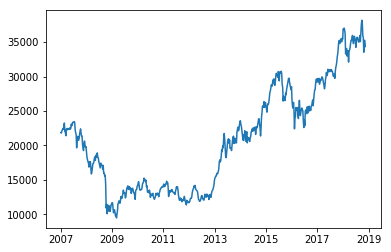

In [24]:
plt.plot(data.index, data.NKYTR, label='NKYTR')
plt.show()

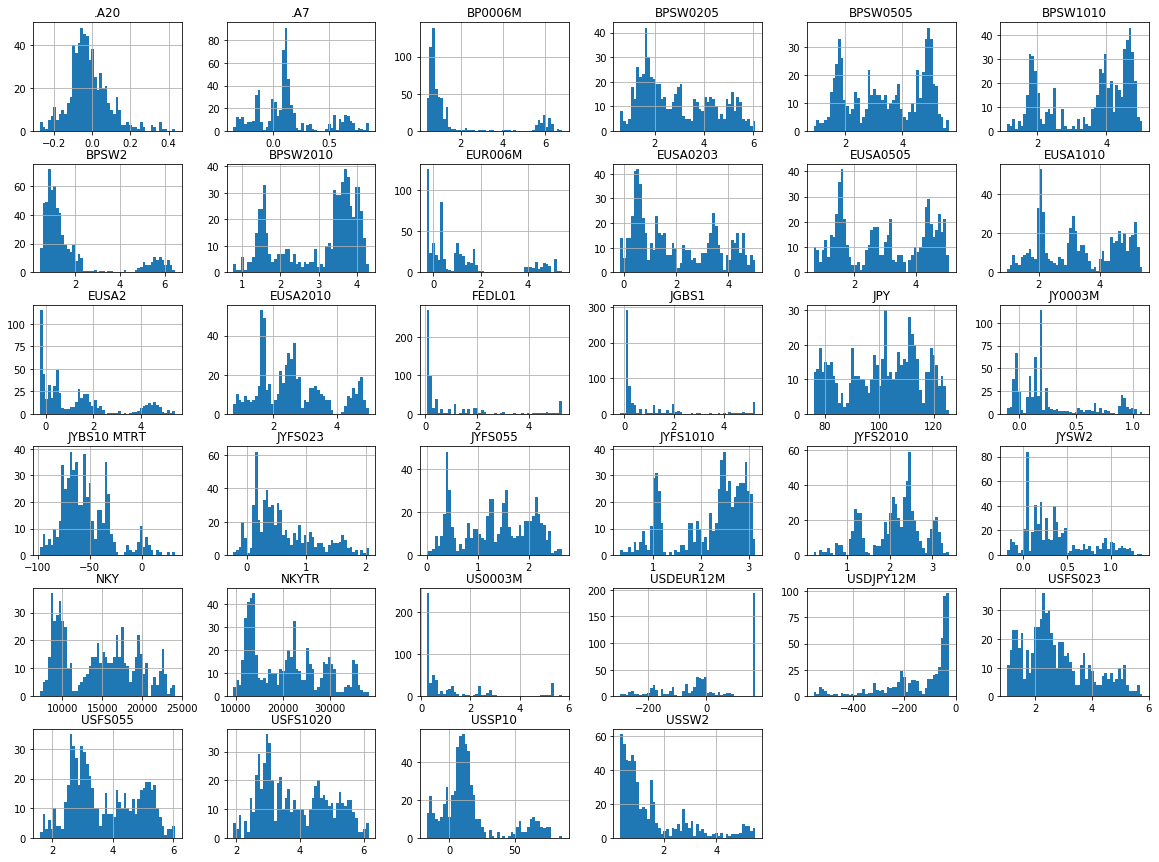

In [25]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
train_set.head()

,JY0003M,JYSW2,JYFS023,JYFS055,JYFS1010,JYFS2010,US0003M,USSW2,USFS023,USFS055,...,.A20,JGBS1,USDJPY12M,JPY,USSP10,JYBS10 MTRT,USDEUR12M,FEDL01,NKYTR,NKY
date,,,,,,,,,,,,,,,,,,,,,
2008-09-12,0.88750,1.0375,1.5077,2.1402,2.8178,2.9251,2.81875,3.1780,4.3602,4.9728,...,-0.0708,1.99,-224.25,107.95,61.50,4.875,167.85003,1.99,15954.66,12214.76
2011-11-25,0.19750,0.4050,0.5620,1.5380,2.4230,2.0670,0.51806,0.8190,1.7372,3.0626,...,0.0660,0.08,-97.70,77.73,19.50,-65.375,-38.05177,0.08,11346.24,8160.01
2015-06-26,0.09429,0.1525,0.4012,1.0162,1.9847,2.1510,0.28175,0.9395,2.4890,3.3545,...,-0.0510,0.13,-102.70,123.85,8.88,-68.375,-68.35395,0.13,30713.48,20706.15
2007-06-22,0.74531,1.1790,1.9992,2.5952,3.1213,3.2234,5.36000,5.3990,5.6685,6.0157,...,-0.2645,5.25,-528.95,123.89,62.00,NaN,167.85003,5.25,23362.70,18188.63
2015-01-23,0.09714,0.1325,0.2465,0.7337,1.8175,1.9298,0.25610,0.7460,1.9728,2.4568,...,-0.0283,0.13,-79.75,117.77,14.25,-67.000,-55.27233,0.13,25772.83,17511.75


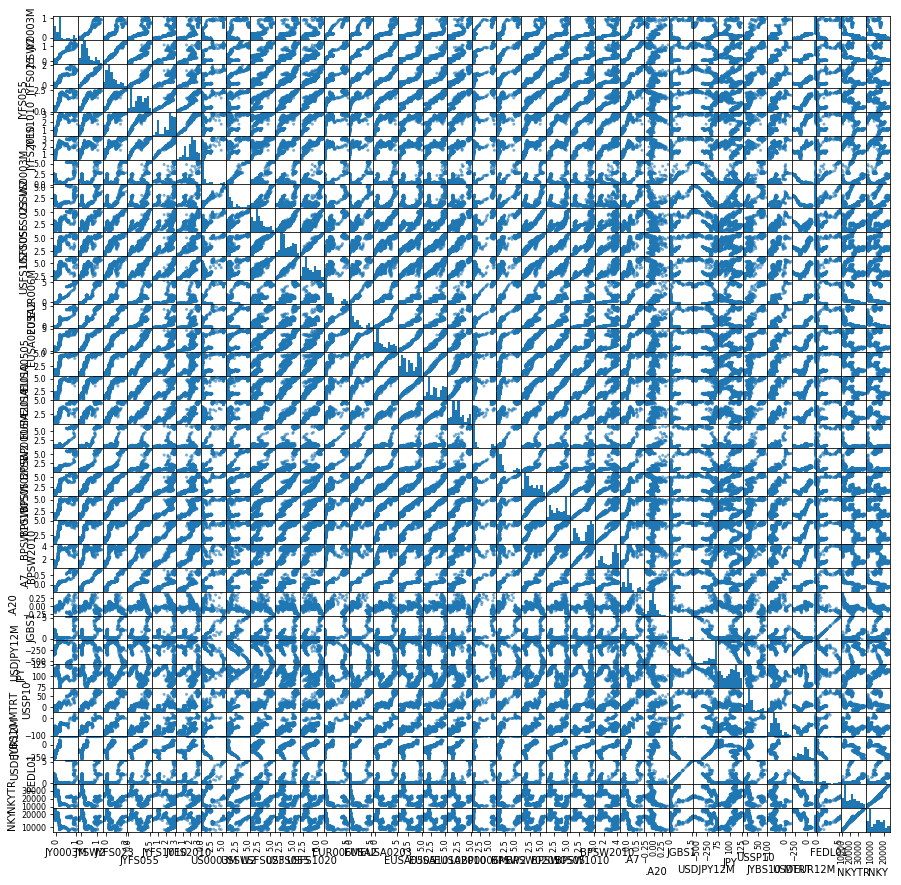

In [38]:
from pandas.plotting import scatter_matrix

attributes = ["JYFS055","JYFS1010","USFS055","USFS1020","EUSA0505","EUSA2010","BPSW0505","BPSW2010"]
#attributes = ["JYFS055","JYFS1010"]
#scatter_matrix(data[attributes], figsize=(12, 8))

color_wheel = {1: "red", 
               2: "blue", 
               3: "green",
               4: "yellow",
               5: "purple",
               6: "pink",
               7: "orange",
               8: "cyan"}
#colors=data['color']
#colors = data['period'].map(lambda x: color_wheel.get(x + 1))
#scatter_matrix(data[attributes], color=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')
#scatter_matrix(data[attributes], alpha=0.6, figsize=(15, 15), diagonal='hist')
scatter_matrix(data, alpha=0.6, figsize=(15, 15), diagonal='hist')
plt.show()

In [28]:
#data.plot.scatter(x=data.index, y='S20')

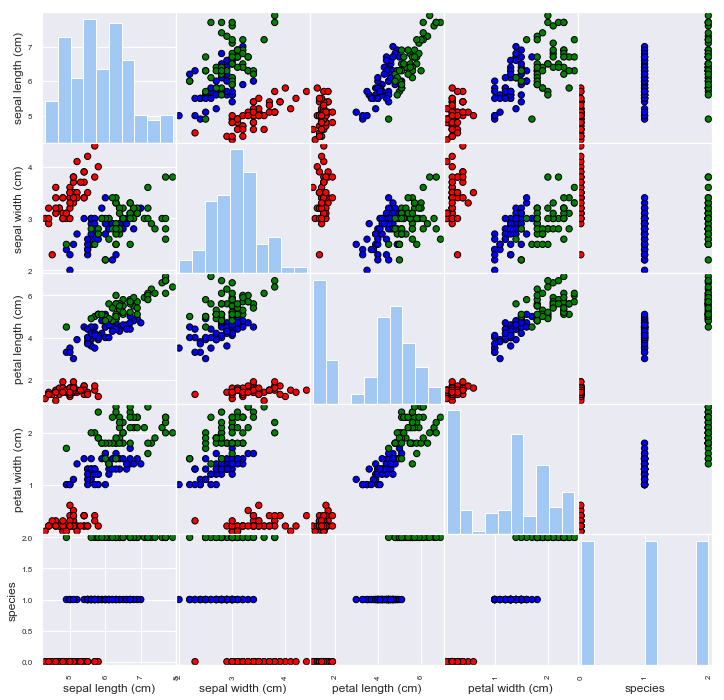

In [86]:
from sklearn import datasets
import seaborn as sns
sns.set()
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']
iris_df.head()
#cols=lisr(map())
#pd.scatter_matrix(iris_df, alpha=0.2, figsize=(10, 10))

color_wheel = {1: "red", 
               2: "blue", 
               3: "green",
               4: "yellow",
               5: "purple",
               6: "pink",
               7: "orange",
               8: "cyan"}
sns.set_palette("pastel")
colors = iris_df['species'].map(lambda x: color_wheel.get(x+1,"black"))
pd.plotting.scatter_matrix(iris_df, color=colors, alpha=1.0, figsize=(12, 12), s=160, edgecolors="black", diagonal='hist')
plt.show()

In [37]:
corr_matrix = data.corr()
corr_matrix["NKYTR"].sort_values(ascending=False).head(30)

NKYTR          1.000000
NKY            0.988276
JPY            0.783075
USSW2          0.232328
FEDL01         0.221164
JGBS1          0.216514
US0003M        0.176819
USFS023       -0.096082
BP0006M       -0.203523
BPSW2         -0.217184
USSP10        -0.302023
JYBS10 MTRT   -0.435435
USFS055       -0.442119
EUR006M       -0.444789
USFS1020      -0.465569
EUSA2         -0.472548
JY0003M       -0.476985
.A7           -0.479094
USDJPY12M     -0.482255
JYFS023       -0.485909
EUSA2010      -0.488304
BPSW0205      -0.506706
JYSW2         -0.510057
JYFS2010      -0.549609
.A20          -0.584529
EUSA0203      -0.614512
EUSA1010      -0.667190
JYFS055       -0.704467
BPSW0505      -0.706884
EUSA0505      -0.707790
Name: NKYTR, dtype: float64

In [217]:
X_num = train_set.drop(["S20","period","color"], axis=1)
X = train_set.drop(["S20",], axis=1)
y = train_set["S20"].copy()
display(X_num.head())
X.head()

,J0.5,J1,J1.5,J2,J3,J4,J5,J6,J7,J8,...,S6,S7,S8,S9,S10,S11,S12,S15,S25,S30
date,,,,,,,,,,,,,,,,,,,,,
2010-08-03,0.120,0.123,0.131,0.140,0.174,0.266,0.370,0.461,0.580,0.735,...,0.654,0.755,0.866,0.983,1.093,1.194,1.284,1.497,1.796,1.825
2016-03-08,-0.155,-0.198,-0.221,-0.238,-0.243,-0.237,-0.233,-0.237,-0.239,-0.195,...,-0.099,-0.060,-0.019,0.025,0.070,0.115,0.161,0.297,0.578,0.639
2007-07-02,0.635,0.820,0.933,1.015,1.166,1.344,1.484,1.591,1.675,1.753,...,1.763,1.858,1.941,2.016,2.083,2.145,2.200,2.342,2.610,2.666
2010-06-30,0.116,0.131,0.136,0.141,0.174,0.244,0.351,0.447,0.589,0.770,...,0.701,0.807,0.926,1.050,1.169,1.277,1.374,1.599,1.910,1.942
2016-02-09,-0.201,-0.229,-0.243,-0.256,-0.263,-0.264,-0.256,-0.261,-0.231,-0.163,...,-0.131,-0.069,-0.006,0.058,0.121,0.187,0.258,0.466,0.908,0.995


,J0.5,J1,J1.5,J2,J3,J4,J5,J6,J7,J8,...,S8,S9,S10,S11,S12,S15,S25,S30,period,color
date,,,,,,,,,,,,,,,,,,,,,
2010-08-03,0.120,0.123,0.131,0.140,0.174,0.266,0.370,0.461,0.580,0.735,...,0.866,0.983,1.093,1.194,1.284,1.497,1.796,1.825,Europe-debt-crisis,cyan
2016-03-08,-0.155,-0.198,-0.221,-0.238,-0.243,-0.237,-0.233,-0.237,-0.239,-0.195,...,-0.019,0.025,0.070,0.115,0.161,0.297,0.578,0.639,NIRP,pink
2007-07-02,0.635,0.820,0.933,1.015,1.166,1.344,1.484,1.591,1.675,1.753,...,1.941,2.016,2.083,2.145,2.200,2.342,2.610,2.666,Pre-Lehman,blue
2010-06-30,0.116,0.131,0.136,0.141,0.174,0.244,0.351,0.447,0.589,0.770,...,0.926,1.050,1.169,1.277,1.374,1.599,1.910,1.942,Europe-debt-crisis,cyan
2016-02-09,-0.201,-0.229,-0.243,-0.256,-0.263,-0.264,-0.256,-0.261,-0.231,-0.163,...,-0.006,0.058,0.121,0.187,0.258,0.466,0.908,0.995,NIRP,pink


In [218]:
X_cat = X[['period']]
X_cat.head()

,period
date,
2010-08-03,Europe-debt-crisis
2016-03-08,NIRP
2007-07-02,Pre-Lehman
2010-06-30,Europe-debt-crisis
2016-02-09,NIRP


In [219]:
from sklearn.preprocessing import LabelEncoder

X_cat_encoded = LabelEncoder().fit_transform(X_cat).reshape(-1,1)
X_cat_encoded

E:\Utilities\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0],
       [2],
       [3],
       ...,
       [4],
       [4],
       [5]], dtype=int64)

In [220]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
X_cat_1hot = cat_encoder.fit_transform(X_cat_encoded)
X_cat_1hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [221]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_num, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [225]:
# try some data
some_data = X_num.iloc[:5]
some_labels = y.iloc[:5]
lin_reg.predict(some_data)
print("Predictions:", lin_reg.predict(some_data))
display(y.head(5))

Predictions: [1.71740658 0.47487867 2.50835779 1.82688937 0.75175888]


date
2010-08-03    1.720
2016-03-08    0.473
2007-07-02    2.511
2010-06-30    1.830
2016-02-09    0.753
Name: S20, dtype: float64

In [226]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_num)
lin_mse = mean_squared_error(y, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.002208201691690163